In [8]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [9]:
(x_train,_),(x_test,_) = mnist.load_data()

In [10]:
X_test = x_test.astype('float32')/255
X_train = x_train.astype('float32')/255


In [13]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [14]:
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [15]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor*np.random.normal(0.0,1.0,X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(0.0,1.0,X_test.shape)


In [16]:
X_train_noisy = np.clip(X_train_noisy,0.,1.)
X_test_noisy = np.clip(X_test_noisy,0.,1.)

print(X_train_noisy.shape , X_test_noisy.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


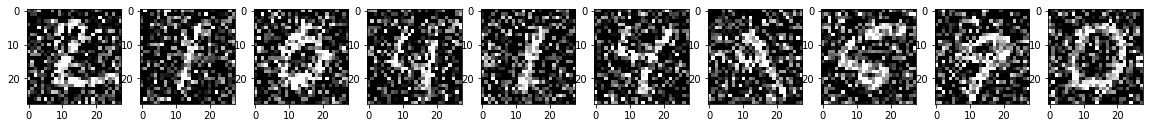

In [20]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    plt.gray()

plt.show()

In [21]:
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,UpSampling2D,Input

In [22]:
input_img = Input(shape=(28,28,1))

x = Conv2D(32,(3,3),activation = "relu",padding="same")(input_img)
x = MaxPool2D((2,2))(x)

x = Conv2D(32,(3,3),activation = "relu",padding="same")(x)
encoded = MaxPool2D((2,2))(x)

x = Conv2D(32,(3,3),activation = "relu",padding="same")(encoded)
x = UpSampling2D((2,2))(x)

x = Conv2D(32,(3,3),activation = "relu",padding="same")(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1,(3,3),activation = "sigmoid",padding ="same")(x)



In [23]:
autoencoder = Model(input_img,decoded)

autoencoder.compile(optimizer = "adadelta",loss = "binary_crossentropy")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
autoencoder.fit(X_train_noisy,X_train,epochs=1,batch_size=128,shuffle=True,validation_data=(X_test_noisy,X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 133s 2ms/step - loss: 0.1825 - val_loss: 0.1253


In [25]:
de_noised_images = autoencoder.predict(X_test_noisy[:10])

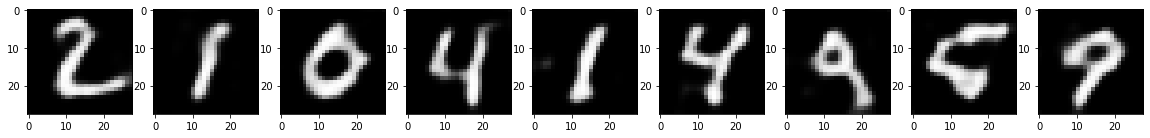

In [26]:
n=9
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(de_noised_images[i].reshape(28,28))
    plt.gray()
    
plt.show()


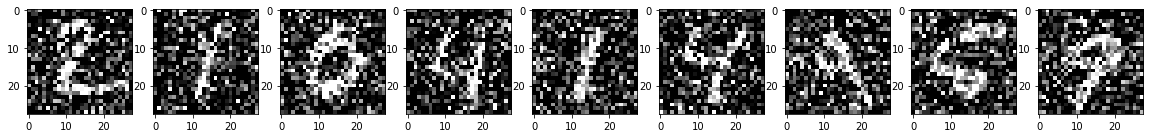

In [27]:
n=9
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    plt.gray()

plt.show()